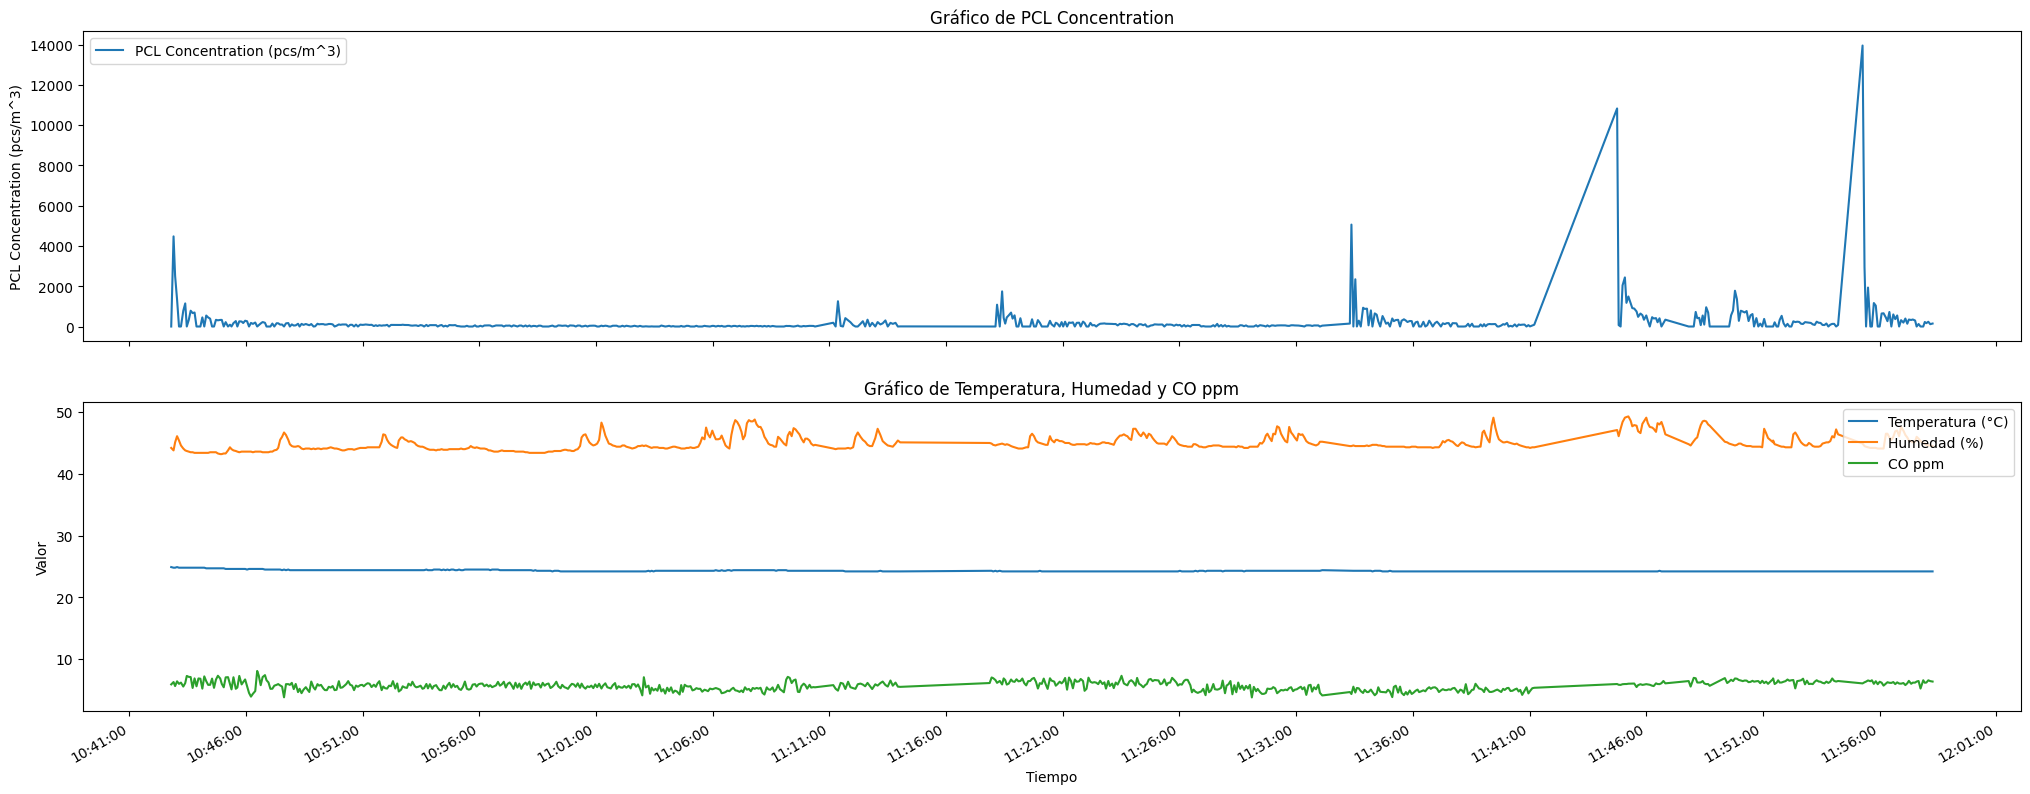

In [21]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates


# Listas para almacenar los datos
dates = []
temperatures = []
humidity = []
co_ppm = []
pcl_concentration = []

# Leer datos del archivo CSV
with open('datos.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        date_str = row['date'].strip('"')
        date = datetime.strptime(date_str, '%d/%m/%Y, %H:%M:%S')

        #No filtrar los datos
        dates.append(date)
        temperatures.append(float(row['temperature'].replace(',', '.')))
        humidity.append(float(row['humidity'].replace(',', '.')))
        co_ppm.append(float(row['co_ppm'].replace(',', '.')))
        pcl_concentration.append(float(row['pcl_concentration'].replace(',', '.'))/1000)

        # # Filtrar los datos para un rango específico de horas
        # if datetime.time(datetime(2023, 8, 8, 10, 56, 0)) <= date.time() <= datetime.time(datetime(2023, 8, 8, 11, 5, 0)):
        #     dates.append(date)
        #     temperatures.append(float(row['temperature'].replace(',', '.')))
        #     humidity.append(float(row['humidity'].replace(',', '.')))
        #     co_ppm.append(float(row['co_ppm'].replace(',', '.')))
        #     pcl_concentration.append(float(row['pcl_concentration'].replace(',', '.')))

# Crear figuras y ejes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(25, 10))


# Graficar pcl_concentration en función del tiempo
ax1.plot(dates, pcl_concentration, label='PCL Concentration (pcs/m^3)')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('PCL Concentration (pcs/m^3)')
ax1.set_title('Gráfico de PCL Concentration')
ax1.legend()

# Graficar temperatura, humedad y CO ppm en función del tiempo
ax2.plot(dates, temperatures, label='Temperatura (°C)')
ax2.plot(dates, humidity, label='Humedad (%)')
ax2.plot(dates, co_ppm, label='CO ppm')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Valor')
ax2.set_title('Gráfico de Temperatura, Humedad y CO ppm')
ax2.legend()

# Formatear eje x para mostrar solo horas y minutos
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# Cambiar la escala de las líneas del grid a intervalos específicos
# x_major_locator = mdates.HourLocator(interval=1)  # Cambia el intervalo según tus preferencias
x_major_locator = mdates.MinuteLocator(interval=5)  # Cambia el intervalo según tus preferencias
# x_major_locator = mdates.SecondLocator(interval=1)  # Cambia el intervalo según tus preferencias
ax1.xaxis.set_major_locator(x_major_locator)
ax2.xaxis.set_major_locator(x_major_locator)

# ax1.yaxis.set_major_locator(plt.MultipleLocator(10))
# ax2.yaxis.set_major_locator(plt.MultipleLocator(10))

# Rotar etiquetas en el eje x para mejorar la legibilidad
plt.gcf().autofmt_xdate()

ax.grid()
plt.show()
